In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pumpkins = pd.read_csv('/home/zeera/ArewaDS_ML_Assignment/regression_task/US-pumpkins.csv')


In [2]:
from sklearn.preprocessing import LabelEncoder

new_columns = ['Color','Origin','Item Size','Variety','City Name','Package']

new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)

In [4]:
new_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 2 to 1698
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   City Name  991 non-null    int64
 1   Package    991 non-null    int64
 2   Variety    991 non-null    int64
 3   Origin     991 non-null    int64
 4   Item Size  991 non-null    int64
 5   Color      991 non-null    int64
dtypes: int64(6)
memory usage: 54.2 KB


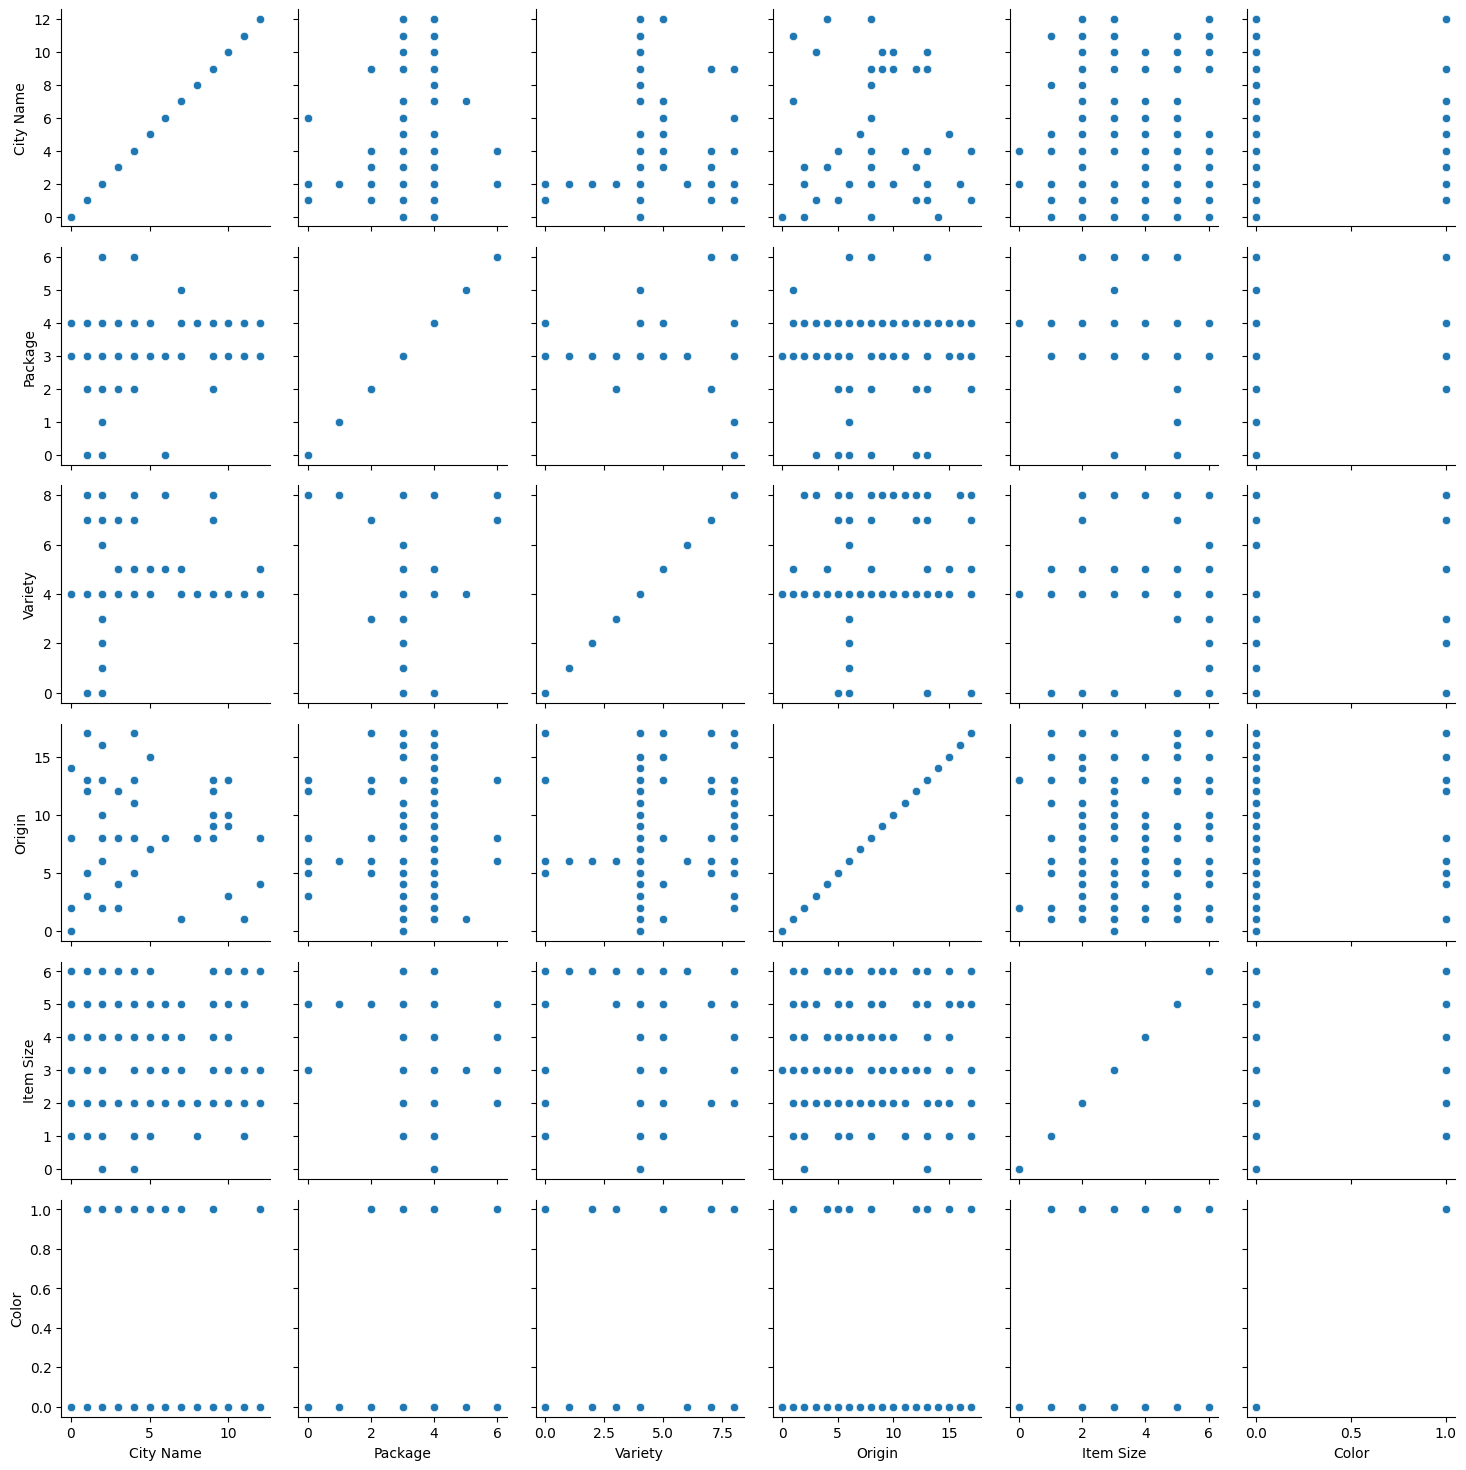

In [5]:
import seaborn as sns

g = sns.PairGrid(new_pumpkins)
g.map(sns.scatterplot)

/home/zeera/miniconda3/envs/arewaDS_folder/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/zeera/miniconda3/envs/arewaDS_folder/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Color', ylabel='Item Size'>

/home/zeera/miniconda3/envs/arewaDS_folder/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/zeera/miniconda3/envs/arewaDS_folder/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


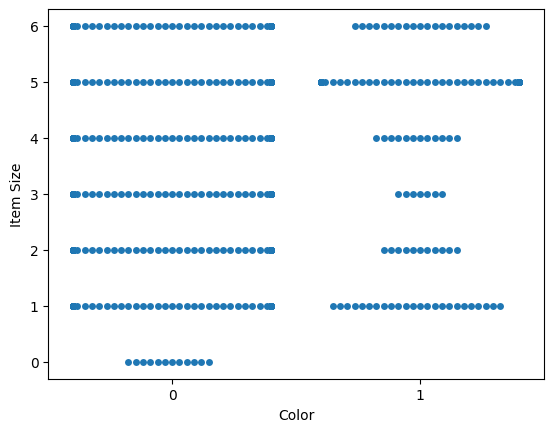

In [6]:
sns.swarmplot(x="Color", y="Item Size", data=new_pumpkins)

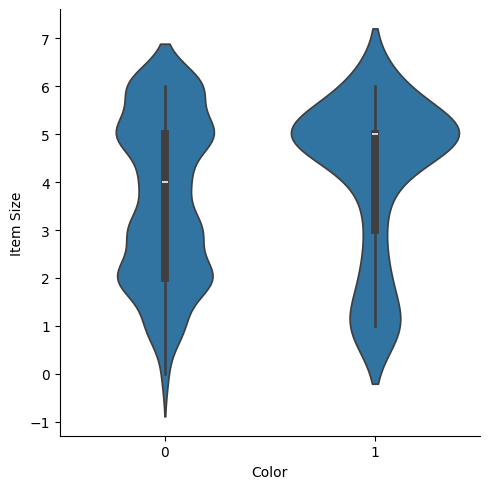

In [7]:
sns.catplot(x="Color", y="Item Size",
            kind="violin", data=new_pumpkins)

In [8]:
from sklearn.model_selection import train_test_split

Selected_features = ['Origin','Item Size','Variety','City Name','Package']

X = new_pumpkins[Selected_features]
y = new_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       166
           1       0.00      0.00      0.00        33

    accuracy                           0.81       199
   macro avg       0.42      0.49      0.45       199
weighted avg       0.69      0.81      0.75       199

Predicted labels:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Accuracy:  0.8140703517587939


In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 33,   0]])

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
sns.lineplot([0, 1], [0, 1])
# sns.lineplot(fpr, tpr)

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given